In [40]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection, preprocessing, pipeline, utils

# Logistic Regression from Scratch with Numpy

## Small example with synthetic data

In [41]:
prng = np.random.RandomState(42)

X, y = datasets.make_moons(
    n_samples=(100, 100),
    shuffle=True,
    noise=0.1,
    random_state=prng,
)

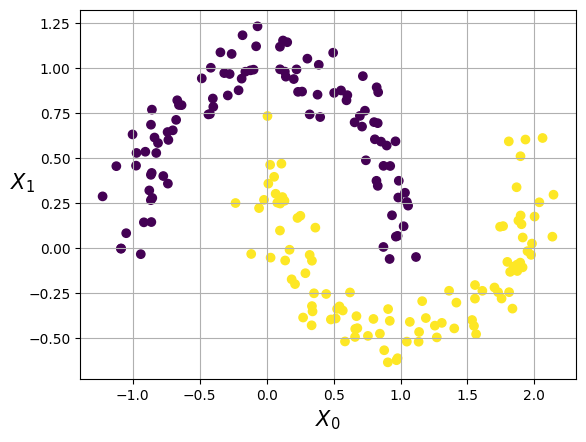

In [42]:
_ = plt.scatter(X[:, 0], X[:, 1], c=y, marker='o')
_ = plt.xlabel(r"$X_0$", fontsize=15)
_ = plt.ylabel(r"$X_1$", fontsize=15, rotation=0)
_ = plt.grid()

### Train-test split

In [43]:
train_features, test_features, train_target, test_target = (
    model_selection.train_test_split(
        X,
        y,
        random_state=prng,
        stratify=y,
        test_size=0.1
    )
)

### Estimating probabilities

In [44]:
def linear_model(X, beta):
    y_hat = X @ beta
    return y_hat.ravel()

def sigmoid(y_hat):
    return 1 / (1 + np.exp(-y_hat))


def predict_proba(X, theta):
    y_hat = linear_model(X, theta)
    return sigmoid(y_hat)


def predict(X, theta, threshold=0.5):
    probas = predict_proba(X, theta)
    return probas > threshold


### Training and Cost Function

In [45]:
def model_fn(X, learned_parameters):
    return predict_proba(X, learned_parameters)


def loss_fn(y, probas):
    return -np.mean(y * np.log(probas) + (1 - y) * np.log(1 - probas))


def grad_fn(theta, X, y):
    m, _ = X.shape
    probas = predict_proba(X, theta)
    grad = -(1 / m) * X.T @ (y - probas)
    return grad.ravel()



### Using Stochastic Gradient Descent

In [48]:
# initialize weights
learned_parameters = prng.normal(loc=0, scale=1, size=(2,))

learning_rate = 0.001
batch_size = 1
epochs = 100
log_epochs = 10

for epoch in range(epochs):

    total_loss = 0.0
    for batch_ixs in utils.gen_batches(len(train_target), batch_size):
        features, target = train_features[batch_ixs], train_target[batch_ixs]

        # forward pass
        predictions = model_fn(features, learned_parameters)
        loss = loss_fn(target, predictions)
        total_loss += loss

        # backward pass
        grad = grad_fn(learned_parameters, features, target)
        learned_parameters -= grad * learning_rate

    if epoch % log_epochs == 0:
        print(f'Epoch {epoch}  Loss {total_loss / len(train_target):.4f}')

Epoch 0  Loss 0.7225
Epoch 10  Loss 0.6069
Epoch 20  Loss 0.5358
Epoch 30  Loss 0.4879
Epoch 40  Loss 0.4536
Epoch 50  Loss 0.4279
Epoch 60  Loss 0.4079
Epoch 70  Loss 0.3921
Epoch 80  Loss 0.3792
Epoch 90  Loss 0.3687


In [50]:
print(f'Final Parameters: {learned_parameters}')

Final Parameters: [ 1.14328538 -1.70795401]


In [51]:
total_loss = 0
for batch_ixs in utils.gen_batches(len(test_target), batch_size):
    features, target = test_features[batch_ixs], test_target[batch_ixs]
    predictions = model_fn(features, learned_parameters)
    loss = loss_fn(target, predictions)
    total_loss += loss

print(f"Average test loss: {total_loss / len(test_target)}")

Average test loss: 0.3340015048297631


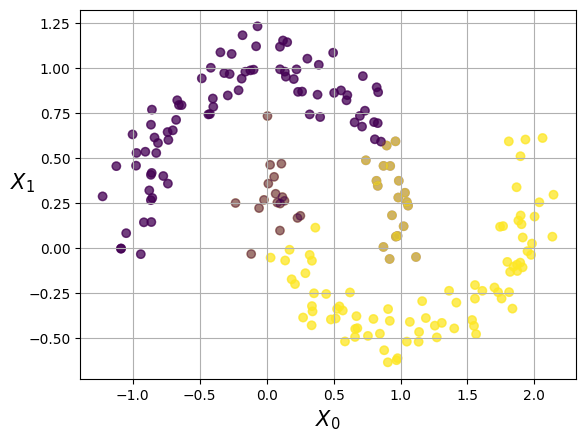

In [52]:
y_hat = predict(X, learned_parameters, threshold=0.5)
_ = plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', alpha=0.5)
_ = plt.scatter(X[:, 0], X[:, 1], c=y_hat, marker='o', alpha=0.5)

_ = plt.xlabel(r"$X_0$", fontsize=15)
_ = plt.ylabel(r"$X_1$", fontsize=15, rotation=0)
_ = plt.grid()


## Example using a real data set

In [ ]:
datasets.load_breast_cancer?

In [56]:
features, targets = datasets.load_breast_cancer(
    return_X_y=True,
    as_frame=True
)

In [57]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [59]:
targets.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

### Train-test split

In [60]:
train_features, test_features, train_target, test_target = (
    model_selection.train_test_split(
        features,
        targets,
        random_state=prng,
        stratify=targets,
        test_size=0.1
    )
)

In [61]:
preprocessing_pipeline = pipeline.make_pipeline(
    preprocessing.StandardScaler().set_output(transform="pandas")
)

scaled_train_features = preprocessing_pipeline.fit_transform(train_features)
scaled_test_features = preprocessing_pipeline.transform(test_features)

In [62]:
scaled_train_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
61,-1.575371,0.370519,-1.544490,-1.244729,2.008102,-0.278047,-0.747321,-1.027225,0.077341,0.659532,...,-1.375751,0.198864,-1.333833,-1.055307,1.386981,-0.538048,-0.870459,-1.308904,0.133342,-0.380797
336,-0.324387,-1.190380,-0.326281,-0.404219,-0.117549,-0.083566,-0.652737,-0.722463,-0.567792,1.332896,...,-0.526113,-1.440913,-0.588982,-0.533483,-0.784928,-0.360742,-0.606560,-0.844567,-0.750679,0.927489
26,0.128496,0.497704,0.225681,-0.029223,0.654504,1.607956,0.694511,1.015731,1.631526,0.893319,...,0.271380,1.197623,0.441219,0.020815,0.888796,2.627211,1.355766,2.353791,2.248444,2.390920
140,-1.250662,-1.712992,-1.272028,-1.053064,-0.269381,-1.221534,-1.131810,-1.267972,0.352256,0.190557,...,-1.160018,-1.895778,-1.202337,-0.936122,-0.382884,-1.163802,-1.302420,-1.728802,0.351073,-0.139276
268,-0.358567,-0.732516,-0.396674,-0.410254,-0.144048,-0.810639,-0.631974,-0.848049,0.744468,-0.723595,...,-0.489306,-0.351506,-0.533383,-0.496345,-0.286744,-0.467637,-0.346452,-0.855148,1.167974,-0.738403


### Using Stochastic Gradient Descent

In [64]:
# initialize weights
_, n = scaled_train_features.shape
learned_parameters = prng.normal(loc=0, scale=1, size=(n,))

learning_rate = 0.001
batch_size = 1
epochs = 200
log_epochs = 10

for epoch in range(epochs):

    total_loss = 0.0
    for batch_ixs in utils.gen_batches(len(train_target), batch_size):
        features = scaled_train_features[batch_ixs]
        target = train_target[batch_ixs]

        # forward pass
        predictions = model_fn(features, learned_parameters)
        loss = loss_fn(target, predictions)
        total_loss += loss

        # backward pass
        grad = grad_fn(learned_parameters, features, target)
        learned_parameters -= grad * learning_rate

    if epoch % log_epochs == 0:
        print(f'Epoch {epoch}  Loss {total_loss / len(train_target):.4f}')

Epoch 0  Loss 1.3836
Epoch 10  Loss 0.1766
Epoch 20  Loss 0.1213
Epoch 30  Loss 0.1004
Epoch 40  Loss 0.0896
Epoch 50  Loss 0.0829
Epoch 60  Loss 0.0782
Epoch 70  Loss 0.0747
Epoch 80  Loss 0.0720
Epoch 90  Loss 0.0697
Epoch 100  Loss 0.0679
Epoch 110  Loss 0.0662
Epoch 120  Loss 0.0648
Epoch 130  Loss 0.0636
Epoch 140  Loss 0.0625
Epoch 150  Loss 0.0615
Epoch 160  Loss 0.0606
Epoch 170  Loss 0.0598
Epoch 180  Loss 0.0591
Epoch 190  Loss 0.0584


In [68]:
print(f'Final Parameters: {learned_parameters}')

Final Parameters: [-1.10725523 -0.05814325 -1.30853076 -1.83678803  0.10419261  1.17608251
 -1.04297378 -1.15362118 -0.24784804 -0.57588507 -2.04047112  0.53037089
 -0.46756827  0.17389439 -0.78511921  0.22252837  0.86483406 -0.42191384
  0.40591846  1.45327641 -1.50378517 -1.77249324  0.56369636  0.73449754
 -0.37826558  0.22835001 -1.36259365 -0.41677784 -0.82045322 -0.89583145]


In [73]:
train_predictions = model_fn(scaled_train_features, learned_parameters)
training_loss = loss_fn(train_target, train_predictions)
print(f"Training loss: {training_loss}")

Training loss: 0.057728822839751115


In [72]:
test_predictions = model_fn(scaled_test_features, learned_parameters)
test_loss = loss_fn(test_target, test_predictions)
print(f"Test loss: {test_loss}")

Test loss: 0.07058017778866699


### Exercise

Compute accuracy, precision, recall, and a fourth metric of your choice on both the training and testing data and interpret your results.